<a href="https://colab.research.google.com/github/ShesterG/Twitter-Sentiment-Analysis/blob/master/notebooks/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA for Twitter Sentiment Analysis

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# Imports & Constants

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [3]:
DATA_FILE_PATH = '/content/drive/MyDrive/NLPGh/'
DATA_FILE_NAME = 'Book10Original.csv'
SAVE_FILE = True


# Read Data File

In [4]:
df = pd.read_csv(DATA_FILE_PATH + DATA_FILE_NAME, encoding = "ISO-8859-1")

In [5]:
df.rename(columns={'prep_tweet': 'pretweet'}, inplace=True)

# Initial Review of Data

In [6]:
df.head()

,Unnamed: 0,tweet,location_x,pretweet,candidate,LRPredScore,LRConfi,Sentiment,Unnamed: 8
0,0,@NsiaAvena @NAkufoAddo They don't know anythin...,NaN,they dont know anyth about peac,Nana,NaN,NaN,-1,NaN
1,2,@NAkufoAddo H. E Nana please follow up on thi...,NaN,nana pleas follow thi fake new lie and sue bbc...,Nana,-3.0,1.0,0,NaN
2,4,@BarrowPresident @NAkufoAddo good to go may Go...,NaN,good may god bless protect you,Nana,NaN,NaN,1,NaN
3,6,@ChipsJhay @TruthFreema @AOuattara_PRCI @NAkuf...,"Afamase Akotom, Ghana",No you havent he use hi freedom speech is he c...,Nana,NaN,NaN,0,NaN
4,7,@IssahGerard @HEgyiri @NAkufoAddo Please who i...,NaN,pleas who thi and how your law,Nana,-1.0,1.0,0,NaN


In [7]:
dfJohn = df[df['candidate']=='John']
dfJohn = dfJohn[dfJohn['Sentiment']==0]
dfJohn = dfJohn.groupby('Sentiment').head(147)

In [8]:
dfNana = df[df['candidate']=='Nana']
dfNana = dfNana[dfNana['Sentiment']==0]
dfNana = dfNana.groupby('Sentiment').head(853)

In [9]:
frames = [dfNana,dfJohn]
df = pd.concat(frames)

In [10]:
df.head()

,Unnamed: 0,tweet,location_x,pretweet,candidate,LRPredScore,LRConfi,Sentiment,Unnamed: 8
1,2,@NAkufoAddo H. E Nana please follow up on thi...,NaN,nana pleas follow thi fake new lie and sue bbc...,Nana,-3.0,1.0,0,NaN
3,6,@ChipsJhay @TruthFreema @AOuattara_PRCI @NAkuf...,"Afamase Akotom, Ghana",No you havent he use hi freedom speech is he c...,Nana,NaN,NaN,0,NaN
4,7,@IssahGerard @HEgyiri @NAkufoAddo Please who i...,NaN,pleas who thi and how your law,Nana,-1.0,1.0,0,NaN
9,17,@Kwame34580189 @bukolasaraki @NAkufoAddo Whate...,Nigeria,whatev thought you had someth there,Nana,NaN,NaN,0,NaN
10,18,@NAkufoAddo Remember that the good people of G...,NaN,rememb that the good peopl have spoken therefo...,Nana,1.0,1.0,0,NaN


In [ ]:
#df = df.groupby('Sentiment').head(500)

## What are the categorical values?

In [ ]:
#df.emotion_in_tweet_is_directed_at.value_counts(dropna=False)

In [15]:
df.Sentiment.value_counts()

 1    1000
-1    1000
 0    1000
Name: Sentiment, dtype: int64

In [16]:
df.candidate.value_counts()

Nana    1853
John    1147
Name: candidate, dtype: int64

In [13]:
dfBalanced = pd.read_csv("/content/drive/MyDrive/NLPGh/Book8Clean.csv", encoding = "ISO-8859-1")

In [14]:
frames = [df,dfBalanced]
df = pd.concat(frames)

## Check for missing data

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 1999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3000 non-null   int64  
 1   tweet        3000 non-null   object 
 2   location_x   1909 non-null   object 
 3   pretweet     3000 non-null   object 
 4   candidate    3000 non-null   object 
 5   LRPredScore  1973 non-null   float64
 6   LRConfi      1973 non-null   float64
 7   Sentiment    3000 non-null   int64  
 8   Unnamed: 8   1 non-null      float64
dtypes: float64(3), int64(2), object(4)
memory usage: 234.4+ KB


In [20]:
print('Number of missing values per feature')
df.isna().sum()

Number of missing values per feature


Unnamed: 0        0
tweet             0
location_x     1091
pretweet          0
candidate         0
LRPredScore    1027
LRConfi        1027
Sentiment         0
Unnamed: 8     2999
dtype: int64

In [21]:
print('Percentage of missing values per feature')
round(df.isna().sum() * 100 / len(df), 2)

Percentage of missing values per feature


Unnamed: 0      0.00
tweet           0.00
location_x     36.37
pretweet        0.00
candidate       0.00
LRPredScore    34.23
LRConfi        34.23
Sentiment       0.00
Unnamed: 8     99.97
dtype: float64

What are all the rows with missing data?

In [22]:
df_missing_target = df[df.Sentiment.isna()]

In [23]:
df_missing_target

,Unnamed: 0,tweet,location_x,pretweet,candidate,LRPredScore,LRConfi,Sentiment,Unnamed: 8


In [ ]:
#df_missing_target.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

In [ ]:
#df_missing_target.is_there_an_emotion_directed_at_a_brand_or_product.value_counts(normalize=True)

## Clean Data

* Delete the line with no Sentiment

In [24]:
df_clean = df.dropna(subset=['Sentiment'])

In [ ]:
#df_clean = df_clean[df_clean.is_there_an_emotion_directed_at_a_brand_or_product != "I can't tell"]

In [ ]:
#df_clean.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

In [ ]:
# change all mentions to @mention (some were already switched but not all)

#df_clean.tweet_text = df_clean.tweet_text.apply(lambda x: re.sub("@[A-Za-z0-9]+", "@mention", x))

## Save Cleaned Data File

In [25]:
CLEAN_DATA_FILE_NAME = 'Book10Clean.csv'

In [26]:
if SAVE_FILE:
    df_clean.to_csv(DATA_FILE_PATH + CLEAN_DATA_FILE_NAME, index=False)

## Visualize Data

## Distribution of Classes

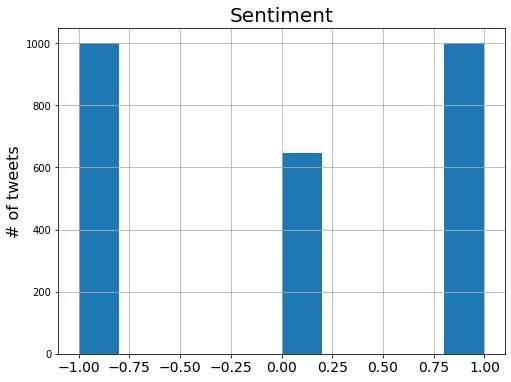

In [21]:
plt.figure(figsize=(8,6))
df_clean.Sentiment.hist(xlabelsize=14)
plt.title('Sentiment', fontsize=20)
plt.ylabel('# of tweets', fontsize=16)
plt.show()

The labels are perfectly balanced as a binary classification problem with Positive vs. Negative emotions.

## How long are the tweets?

In [28]:
df_clean['tweet_len'] = df_clean.pretweet.apply(len)

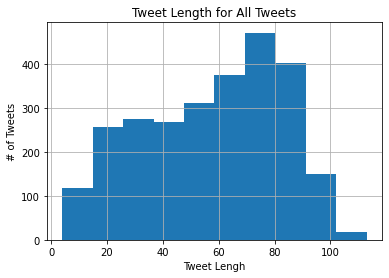

In [23]:
df_clean.tweet_len.hist()
plt.title('Tweet Length for All Tweets')
plt.xlabel('Tweet Lengh')
plt.ylabel('# of Tweets')
plt.show()

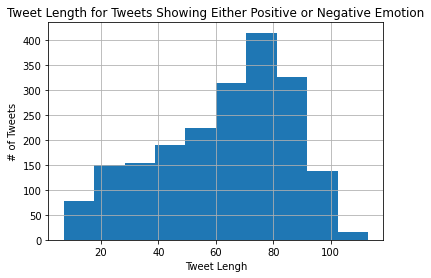

In [24]:
df_clean[df_clean.Sentiment != 0].tweet_len.hist()
plt.title('Tweet Length for Tweets Showing Either Positive or Negative Emotion')
plt.xlabel('Tweet Lengh')
plt.ylabel('# of Tweets')
plt.show()

In [25]:
df_clean.tweet_len.max()

113

In [26]:
pd.set_option('display.max_colwidth', None)

In [27]:
df_clean[df_clean.tweet_len > 100].head()

,Unnamed: 0,tweet,location_x,pretweet,candidate,LRPredScore,LRConfi,Sentiment,Unnamed: 8,tweet_len
439,999,@NAkufoAddo His Excellence please kindly work with hard working Ministers not those who just talk without action. Still \n#4moretodomore,"Accra, Ghana",hi excel pleas kindli work with hard work minist not those who just talk without action still 4moretodomor,Nana,NaN,NaN,0,NaN,106
1065,2517,"Nana Addo, please for one of your first projects, kindly come and complete the Tanoso-Abuakwa dual carriageway for us we begÃ°Å¸ËÂ­Ã°Å¸â¢ï¿½Ã°Å¸ï¿½Â¾ @NAkufoAddo",NaN,nana addo pleas for one your first project kindli come and complet the tanosoabuakwa dual carriageway for beg,Nana,-2.0,1.0,-1,NaN,109
1111,2637,@NAkufoAddo To God be all the glory. May God grant you Supernatural understanding to lead the Nation alright. Congratulations your Excelleny,NaN,god all the glori may god grant you supernatur understand lead the nation alright congratul your excelleni,Nana,1.0,1.0,1,NaN,106
1384,6681,"Good Woman, #Vote Campaign Compares #FreeSHS - The 8.8 million women campaign supports the Free SHS policy of PresiÃ¢â¬Â¦ https://t.co/unN54sbh0j","Accra ,Ghana",good woman vote campaign compar freesh the 88 million women campaign support the free sh polici presi,Nana,3.0,1.0,1,NaN,101
1400,7010,#JohnMahama2020 \n\nPlease lets all come together to rescue Ghana from #dishonest and #corrupt family and friends govÃ¢â¬Â¦ https://t.co/JEtk17qbF3,Ghana,johnmahama2020 pleas let all come togeth rescu ghana from dishonest and corrupt famili and friend gov,Nana,-3.0,1.0,-1,NaN,101
